<a href="https://colab.research.google.com/github/yashtambee/Airline-Passenger-Referral-Prediction/blob/main/Yash_Tambe_Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✈️Airline Passenger Referral Prediction**    



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1**  - Yash Tambe
##### **Team Member 2**  - Chaitanya Chaudhari

# **Project Summary -**

In Airline Passenger Referral Prediction capstone project our main objectives to predict whether passengers will refer the airline to their friends. Therefore according to the data given in the dataset, we will implement the Machine learning classification model to predict the right travel airline for the passengers. And accordingly we will make their cross validation and hyper parameter tuning to make the predictions more accurate. For this process, we will try to conditioned our data as per requirement we have.

# **GitHub Link -**

https://github.com/yashtambee/Airline-Passenger-Referral-Prediction

# **Problem Statement**


Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.The main objectives to predict whether passengers will refer the airline to their friends.

# **Let's Begin !**

## **Know Your Data**

### Import Libraries

In [199]:
# Import Libraries
import pandas as pd
import numpy as np
49

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, auc
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!pip install eli5
import eli5 as eli

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [200]:
# Load Dataset
airline_df = pd.read_excel("https://github.com/yashtambee/Airline-Passenger-Referral-Prediction/blob/main/data_airline_reviews.xlsx?raw=true")

### Dataset First View

In [201]:
# Dataset First Look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [203]:
# Dataset Rows & Columns count
print(f'In the given dataset,\nThe total number of rows are {airline_df.shape[0]} and \nThe total number of columns are {airline_df.shape[1]}')

In the given dataset,
The total number of rows are 131895 and 
The total number of columns are 17


### Dataset Information

In [204]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

##**Understanding Your Variables**

In [205]:
# Dataset Describe
airline_df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


In [206]:
# Dataset Columns
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

### Variables Description 

**airline**: Name of the airline.

**overall**: Overall point is given to the trip between 1 to 10.

**author**: Author of the trip

**review date**: Date of the Review

**customer review**:Review of the customers in free text format

**aircraft**: Type of the aircraft

**traveller type**: Type of traveler (e.g. business, leisure)

**cabin**: Cabin at the flight date flown: Flight date

**seat comfort**: Rated between 1-5

**cabin service**: Rated between 1-5

**foodbev**: Rated between 1-5

**entertainment**: Rated between 1-5

**ground service**: Rated between 1-5

**value for money**: Rated between 1-5

**recommended**: Binary, target variable.

##**Data Wrangling**

#### Duplicate Values

In [207]:
# Dataset Duplicate Value Count
len(airline_df[airline_df.duplicated()])

70711

In [208]:
# permanently dropping the duplicate rows from the dataset
airline_df.drop_duplicates(inplace = True)

In [209]:
# checking the duplicate rows again afer dropping them 
len(airline_df[airline_df.duplicated()])

0

In [210]:
# checking the dataset shape after droping the duplicate rows
airline_df.shape

(61184, 17)

As we can see after dropping duplicate rows our shape of dataset got reduced from 131895 rows 17 columns to 61184 rows 17 columns

In [211]:
# first view of the dataset after dropping the duplicate rows
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes


#### Missing Values/Null Values

In [212]:
# Missing Values/Null Values Count
null_values = airline_df.isna().sum()
null_values

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

Text(0.5, 1.0, 'Null values in dataframe')

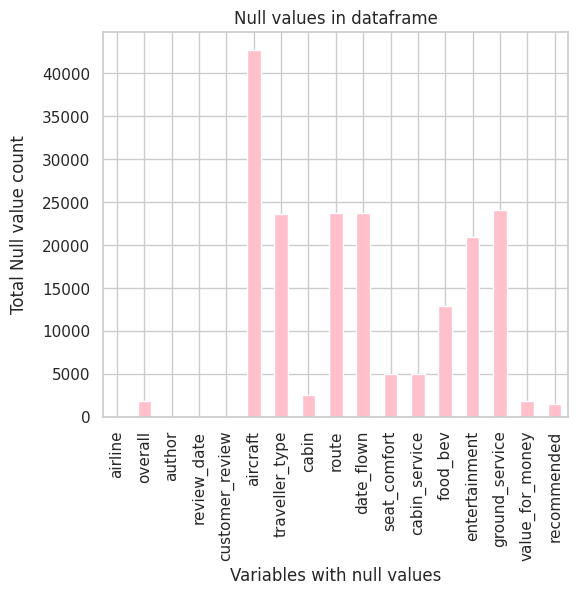

In [213]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (6,5)
airline_df.isna().sum().plot(kind = 'bar', color = 'pink')
plt.xlabel('Variables with null values')
plt.ylabel('Total Null value count',labelpad = 10)
plt.title('Null values in dataframe')

In [214]:
# Permanently dropping the null values 
airline_df.dropna(inplace=True)

In [215]:
# checking the dataset shape after droping the null values
airline_df.shape

(13189, 17)

As we can see after dropping duplicate rows our shape of dataset got reduced from 61184 rows 17 columns to 13189 rows 17 columns

### Check Unique Values for each variable.

In [216]:
# Check Unique Values for each variable 
# creating an object named required_variables that will contain all 
required_variables = airline_df.loc[:,:]
for i in required_variables.columns :
  print(f'Unique values for variable {i} is as below :')
  print(required_variables[i].unique())
  print('\n')

Unique values for variable airline is as below :
['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBalt

# **EDA (Explorative Data Analysis)**

#### Analysing which airline has most no of overall ratings points


In [217]:
# performing groupby operation to find the best airline with best overall perfromance
most_overall_rating = airline_df.groupby('airline')['overall'].sum().sort_values(ascending= False)
most_overall_rating

airline
China Southern Airlines    6993.0
Qatar Airways              5667.0
Emirates                   5199.0
British Airways            4921.0
Cathay Pacific Airways     3876.0
                            ...  
Adria Airways                40.0
Tunisair                     34.0
QantasLink                   27.0
Germanwings                  14.0
airBaltic                     9.0
Name: overall, Length: 81, dtype: float64

Text(0.5, 1.0, '')

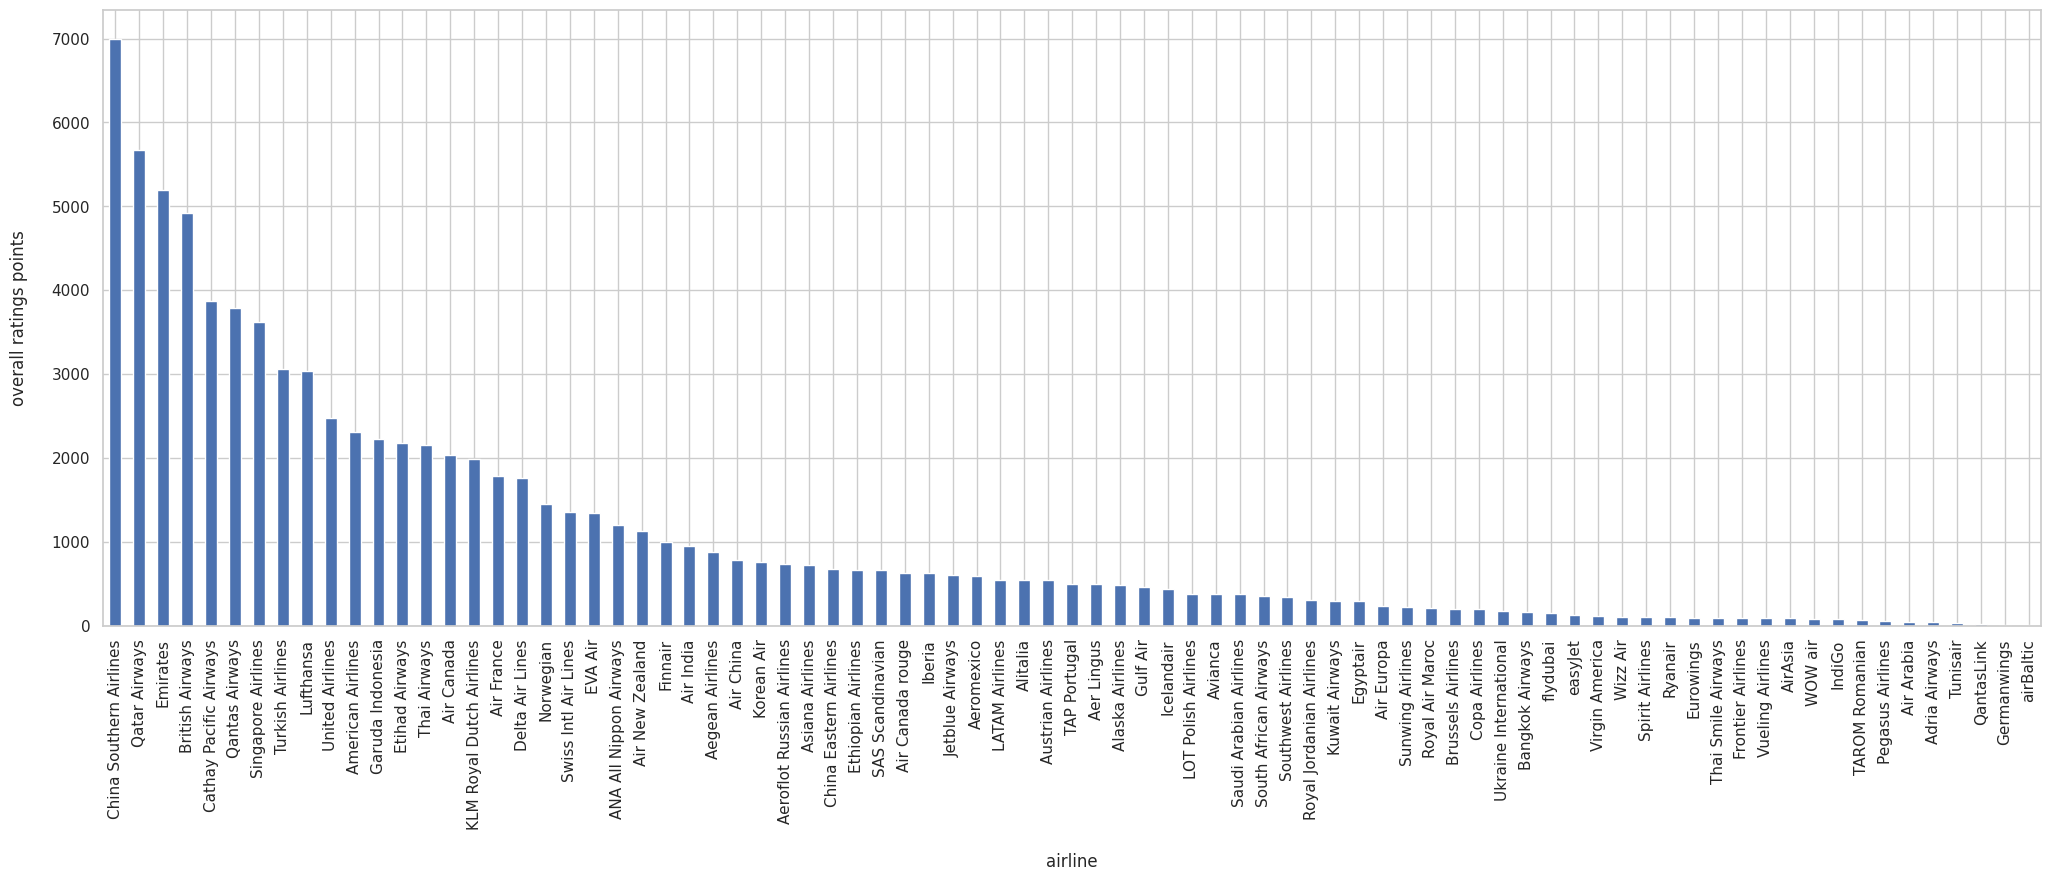

In [218]:
# visualizing the above result 
plt.rcParams['figure.figsize'] = (25,8)
most_overall_rating.plot(kind = 'bar')

# assigning title, x label , y label to the plot
plt.xlabel('airline', labelpad = 17, fontsize = 12)
plt.ylabel('overall ratings points', labelpad = 17, fontsize = 12)
plt.title('', pad = 19, fontsize = 14)


From the above bar plot we can see that China Southern Airlines has the most numbers of the overall reviews

#### Analysing which airline is the most worthy for money

In [219]:
# finding the most worthy for money airline using groupby operation on 'airline' & 'value for money' feature 
airline_most_worthy_for_money = airline_df.groupby('airline')['value_for_money'].sum().sort_values(ascending=False)
airline_most_worthy_for_money

airline
China Southern Airlines    3758.0
Qatar Airways              2988.0
Emirates                   2897.0
British Airways            2710.0
Cathay Pacific Airways     2019.0
                            ...  
Adria Airways                21.0
Tunisair                     19.0
QantasLink                   12.0
Germanwings                   6.0
airBaltic                     6.0
Name: value_for_money, Length: 81, dtype: float64

Text(0.5, 1.0, '')

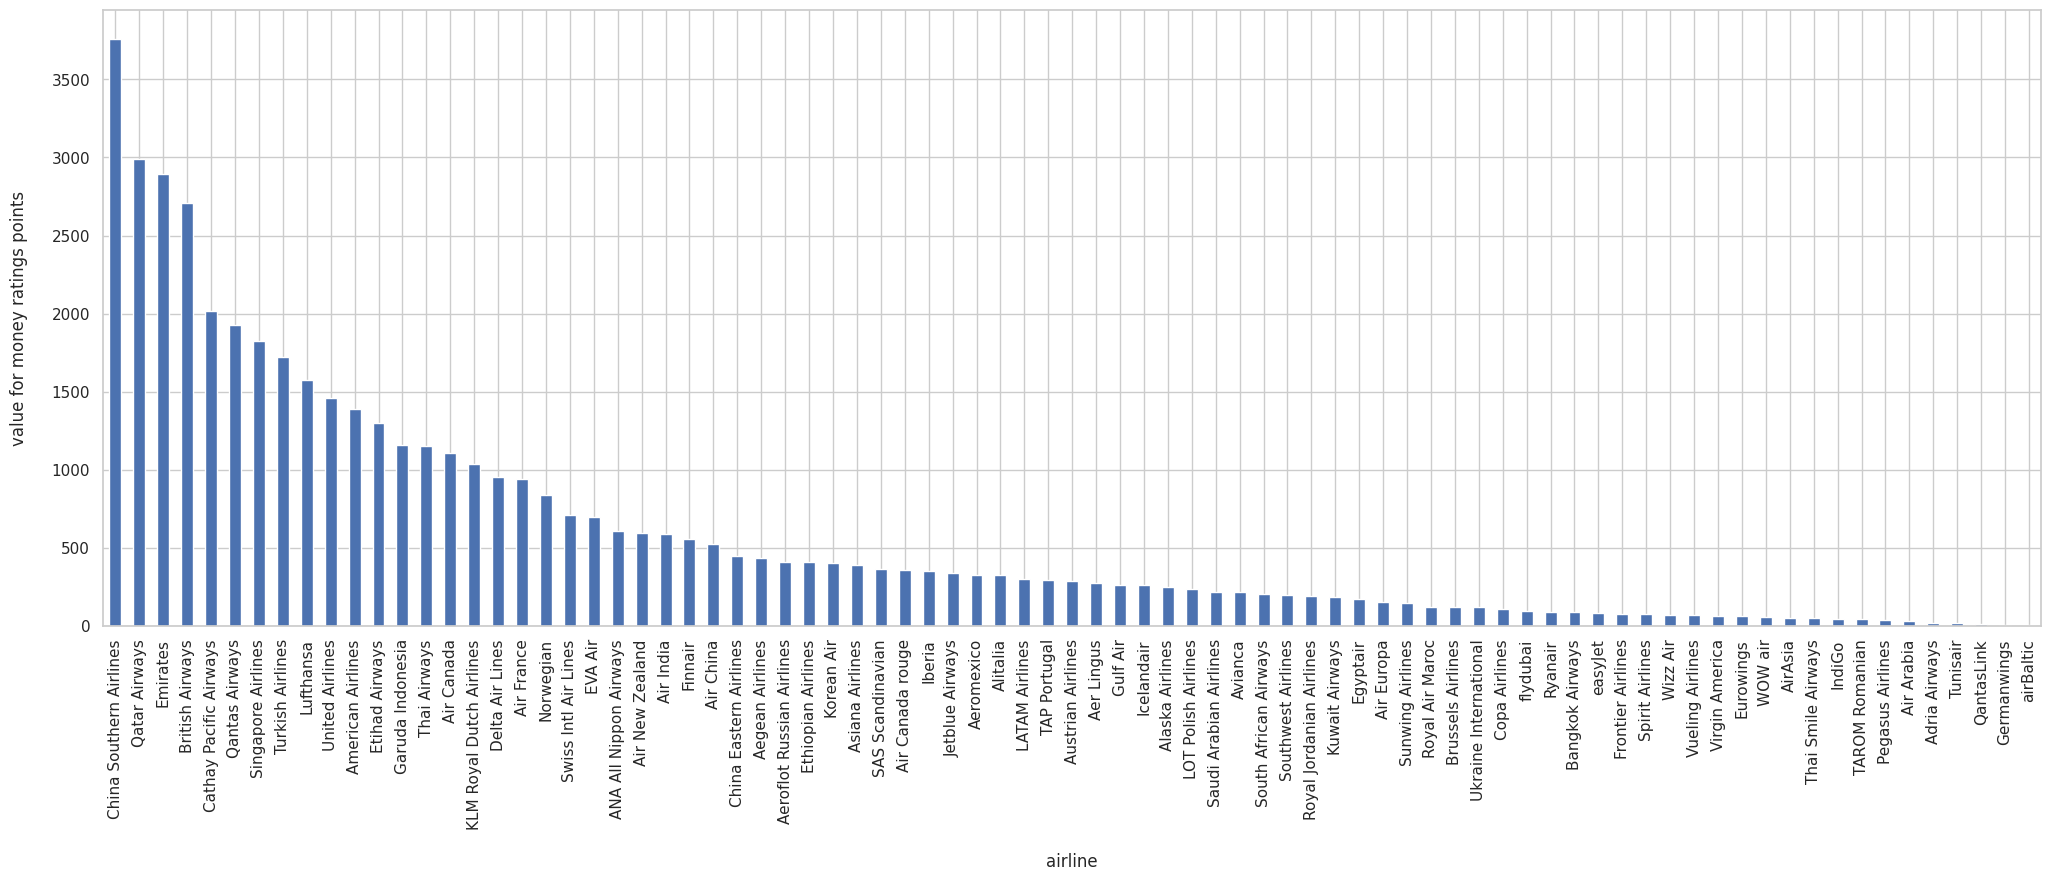

In [220]:
# visualizing the above result 
plt.rcParams['figure.figsize'] = (25,8)
airline_most_worthy_for_money.plot(kind = 'bar')

# assigning title, x label , y label to the plot
plt.xlabel('airline', labelpad = 17, fontsize = 12)
plt.ylabel('value for money ratings points', labelpad = 17, fontsize = 12)
plt.title('', pad = 19, fontsize = 14)

From the above pie plot we can see that the 'China Southern Airlines' is the most worthy for money airline and the 'airBaltic' airline is the least worthy for money travel

#### Analysing the food beverages and entertaiment average ratings given by passenger


In [221]:
# finding the average ratings of food beverages and entertaiment
avg_rating_foodbev_and_entertainment = airline_df.groupby('cabin')[['food_bev','entertainment']].mean()
avg_rating_foodbev_and_entertainment

,food_bev,entertainment
cabin,,
Business Class,3.629542,3.529226
Economy Class,3.180616,3.236747
First Class,3.554128,3.495413
Premium Economy,3.254524,3.429433


Text(0.5, 0, 'cabin type')

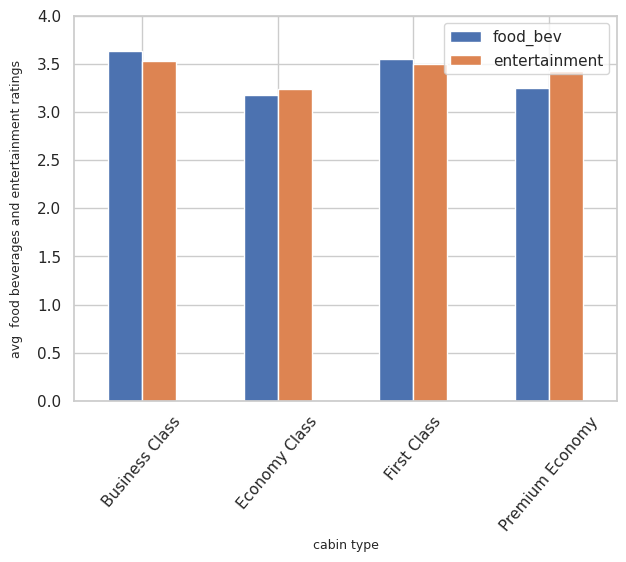

In [222]:
# visualizing the average food beverages & entertainment ratings given by the passengers
plt.rcParams['figure.figsize'] = (7,5)
avg_rating_foodbev_and_entertainment.plot(kind = 'bar')
plt.ylim([0,4])
plt.xticks(rotation = 50)
plt.ylabel('avg  food beverages and entertainment ratings',fontsize = 9,labelpad = 10)
plt.xlabel('cabin type',fontsize = 9)

Economy class has the lowest average food beverages and entertaining ratings as compared to other classes

Whereas the Business Class has the highest food beverages and entertaining ratings

#### Analysing top 10 airline with most number of trips ?

In [223]:
# finding the top 10 airlines with most no. of trips
top_10_airlines = airline_df['airline'].value_counts().head(10)

Text(0.5, 1.0, 'top 10 airlines with most no. of trips')

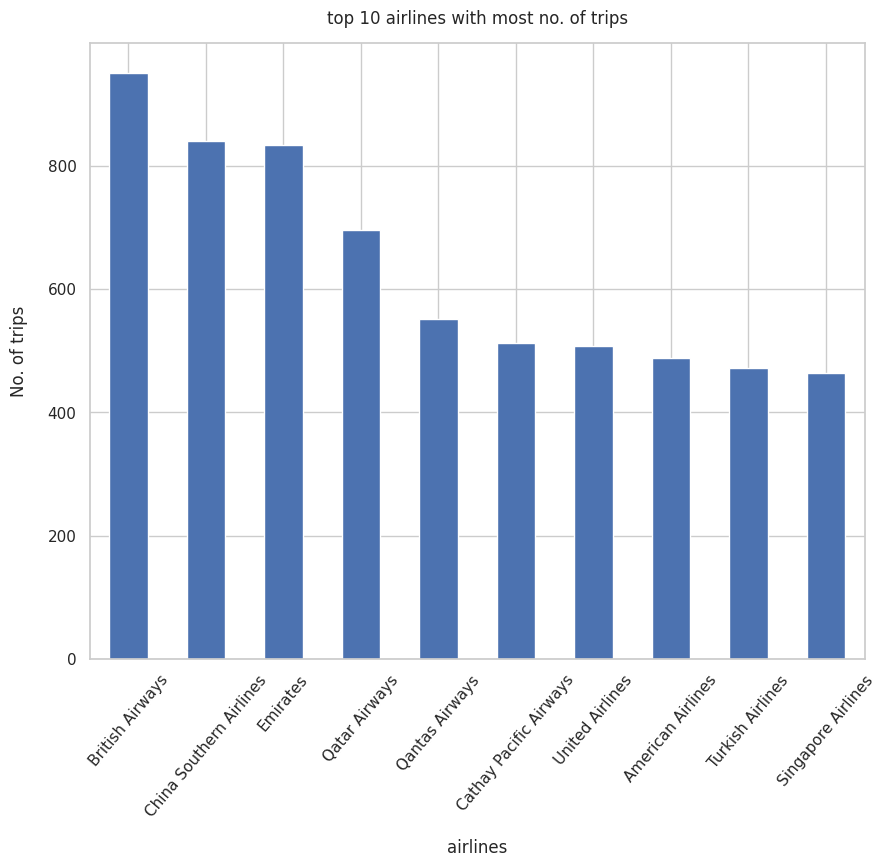

In [224]:
# visualizing the top 10 airlines with most no. of trips
plt.rcParams['figure.figsize'] = (10,8)
top_10_airlines.plot(kind = 'bar')
plt.xticks(rotation = 50)
plt.ylabel('No. of trips',fontsize = 12,labelpad = 14)
plt.xlabel('airlines',fontsize = 12,labelpad = 14)
plt.title('top 10 airlines with most no. of trips',pad = 14,fontsize = 12)

British Airways ranked at the top among the list of top 10 airlines with most number of trips

### Checking the distribution of dependent variable 

In [225]:
# checking the distribution of values of YES - NO  
target_distribution = airline_df['recommended'].value_counts()
target_distribution

yes    8802
no     4387
Name: recommended, dtype: int64

Text(0, 0.5, 'count')

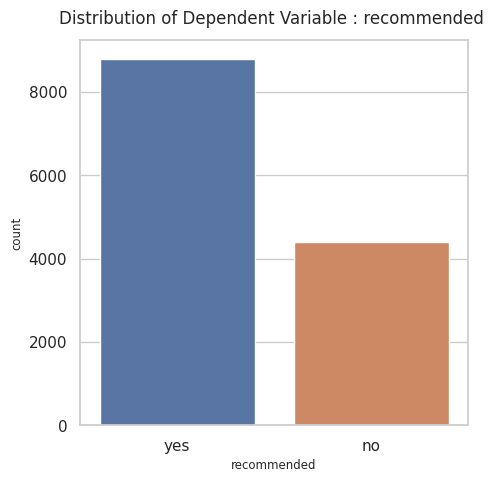

In [226]:
# visualizing the distribution of the dependent variable
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(x = airline_df['recommended'])
plt.title('Distribution of Dependent Variable : recommended ',pad = 12)
plt.xlabel('recommended',fontsize = 8.5)
plt.ylabel('count',fontsize = 8.5)

From the above visualization, we got know that among nearly 13000 times passengers have travelled by flights, they recommended 8802 times that we can travel by airway.

<Axes: ylabel='recommended'>

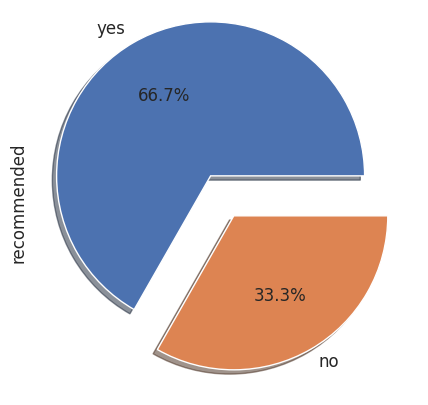

In [227]:
# checking the percentage of distribution of yes v/s no
target_distribution.plot(kind = 'pie',autopct='%.1f%%', shadow = True, explode = [0.2,0.1], fontsize = 12)

### Checking the Distribution of the Independent variables




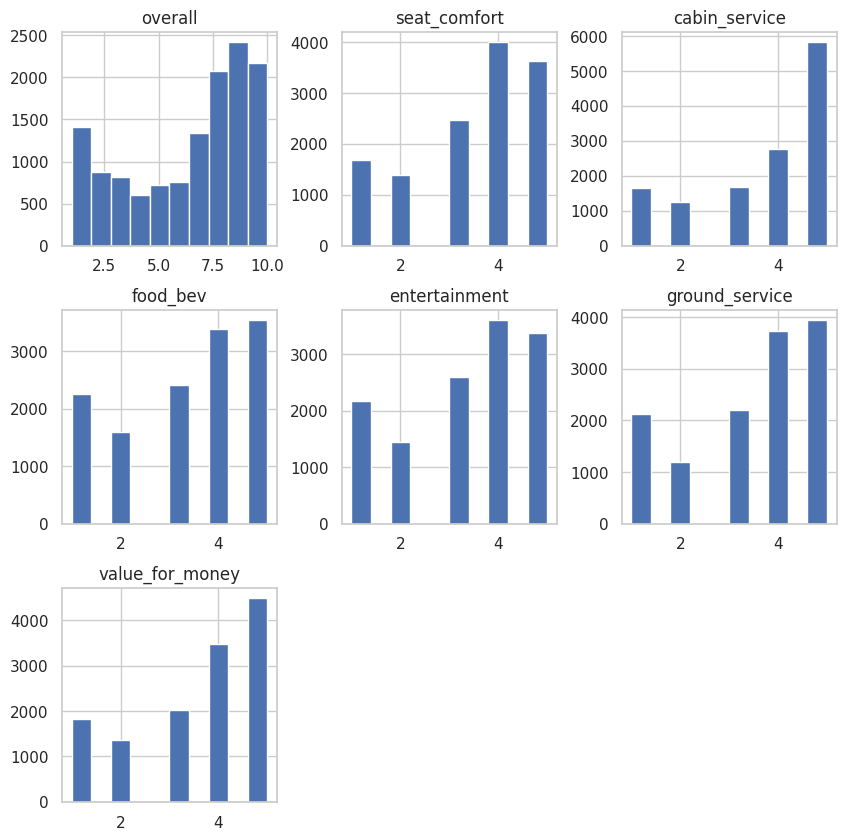

In [228]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
airline_df.hist(ax = ax)
plt.show()

### Checking the relationship between categorical dependent variable and independent variable

In [229]:
# defining the categorical variable list 
categorical_features = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

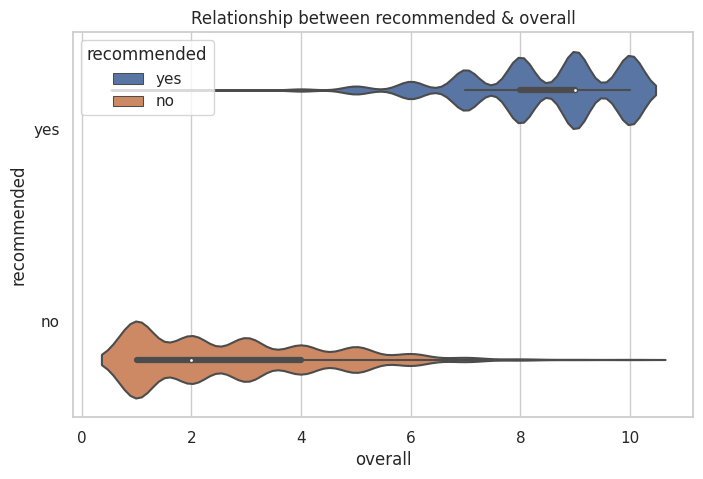

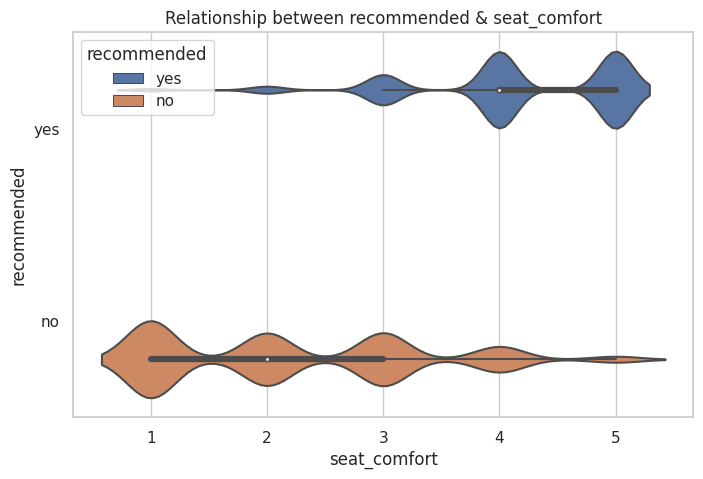

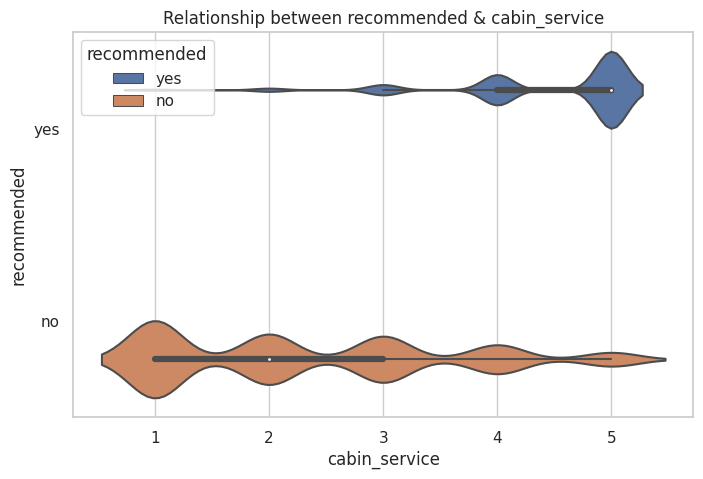

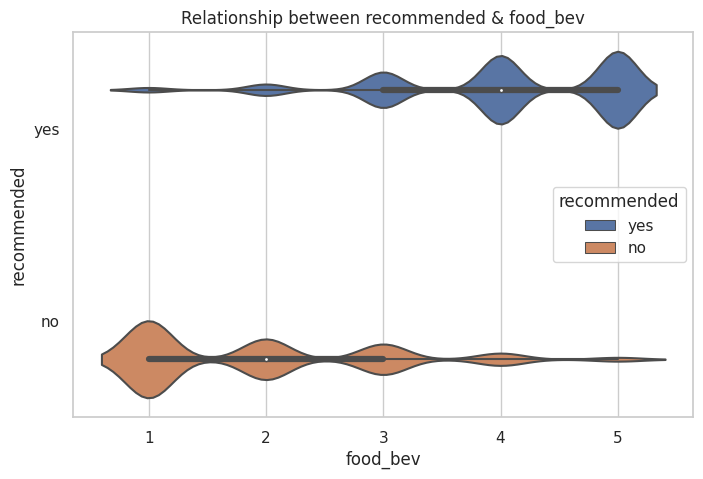

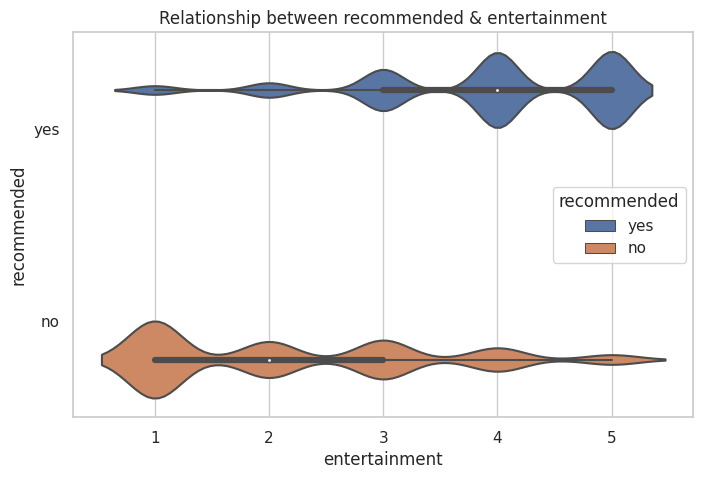

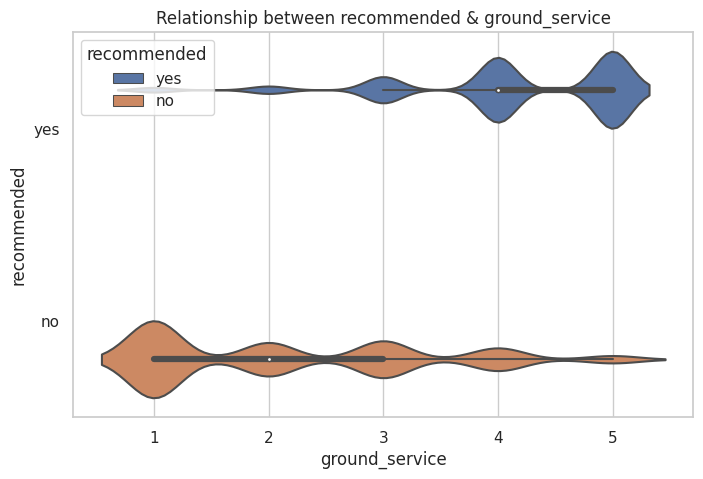

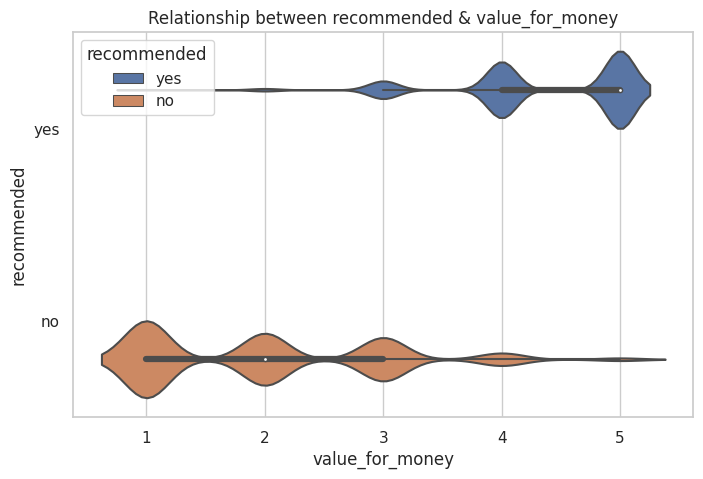

In [230]:
# visualizing the relationship between categorical dependent & independent variables
for col in categorical_features : 
  plt.figure(figsize=(8,5))
  sns.violinplot(x=col, y="recommended", data=airline_df, hue = 'recommended') # plots the violin plot
  plt.title("Relationship between recommended &" + " " + col)                  # assining title to the plot

### Checking Multi - Collinearity 

In [231]:
# encoding the dependent variable "recommended" as it is going to be used for checking multicollinearity
airline_df['recommended'] = airline_df['recommended'].map({'yes':1,'no':0})

In [232]:
# checking the correlations among the features
airline_df.corr()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
overall,1.000000,0.768888,0.792661,0.780600,0.667138,0.747686,0.866398,0.864879
seat_comfort,0.768888,1.000000,0.642294,0.654444,0.623992,0.592535,0.707641,0.678922
cabin_service,0.792661,0.642294,1.000000,0.727462,0.556402,0.616879,0.707305,0.714574
food_bev,0.780600,0.654444,0.727462,1.000000,0.630964,0.580314,0.711046,0.691161
entertainment,0.667138,0.623992,0.556402,0.630964,1.000000,0.521133,0.605228,0.577187
ground_service,0.747686,0.592535,0.616879,0.580314,0.521133,1.000000,0.674673,0.655282
value_for_money,0.866398,0.707641,0.707305,0.711046,0.605228,0.674673,1.000000,0.789438
recommended,0.864879,0.678922,0.714574,0.691161,0.577187,0.655282,0.789438,1.000000


<Axes: >

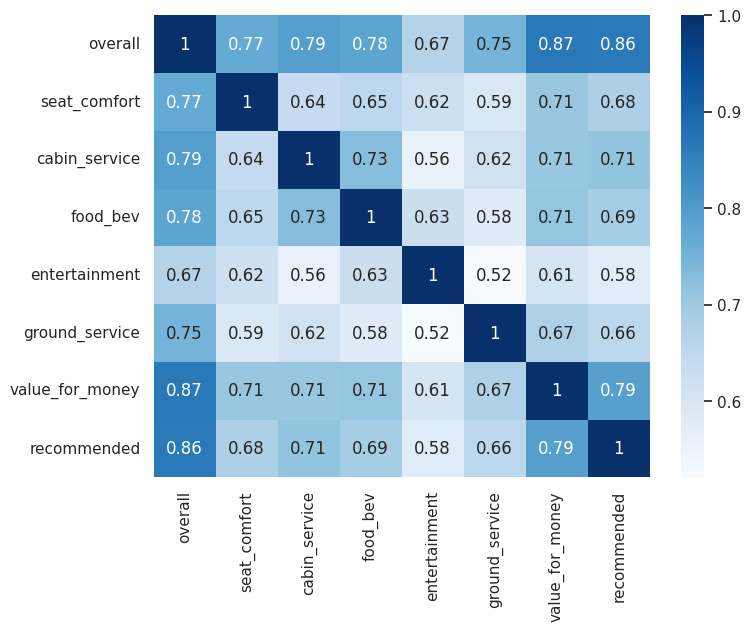

In [233]:
# analyisng the Correlations of features using the heatmap
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(abs(airline_df.corr()),annot = True, cmap = 'Blues')

### VIF (Variance Inflation Factor) Analysis of Independent Variables
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.



In [234]:
# defining a function to calculate the VIF 
def cal_vif(x) :
# calculating vif
  vif = pd.DataFrame()
  vif['variables'] = x.columns # rows will be column of the passed dataset
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])] # df.shape[1] means shape of the columns
                                                                                  
  return(vif) # returning vif df

In [235]:
cal_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['airline','author','review_date','customer_review','aircraft',
                                                                          'traveller_type','cabin','date_flown','route','recommended']]])

,variables,VIF
0,overall,32.935217
1,seat_comfort,19.233666
2,cabin_service,21.181802
3,food_bev,19.144111
4,entertainment,12.903545
5,ground_service,14.755279
6,value_for_money,28.674325


Here the 'overall' and 'value for money' feature has very VIF factor & has very high collinearity of 0.87

Also 'overall' and 'recommended' has correlation of 0.86

'value for money' and 'recommended' has correlation of  0.79

So we will drop 'value_for_money' feature

Further we are having high VIF values for remaining features but they are not exhibiting very high correlation in the heatmap plot. 

So we will conclude our VIF process here

In [236]:
# dropping 'value_for_money' feature from the VIF list
cal_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['airline','author','review_date','customer_review',
                                                                          'aircraft','traveller_type','cabin','date_flown','route',
                                                                          'recommended','value_for_money']]])

,variables,VIF
0,overall,26.621089
1,seat_comfort,18.511466
2,cabin_service,20.845363
3,food_bev,18.937390
4,entertainment,12.811526
5,ground_service,14.339958


<Axes: >

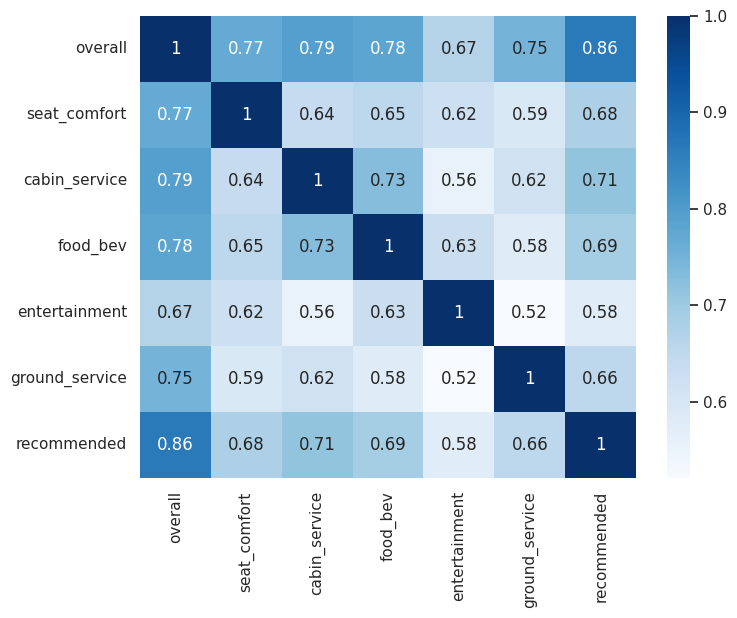

In [237]:
# analyisng the Correlations of features using the heatmap after dropping the 'overall' feature
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','recommended']].corr(),annot = True, cmap = 'Blues')

### Outlier Detection

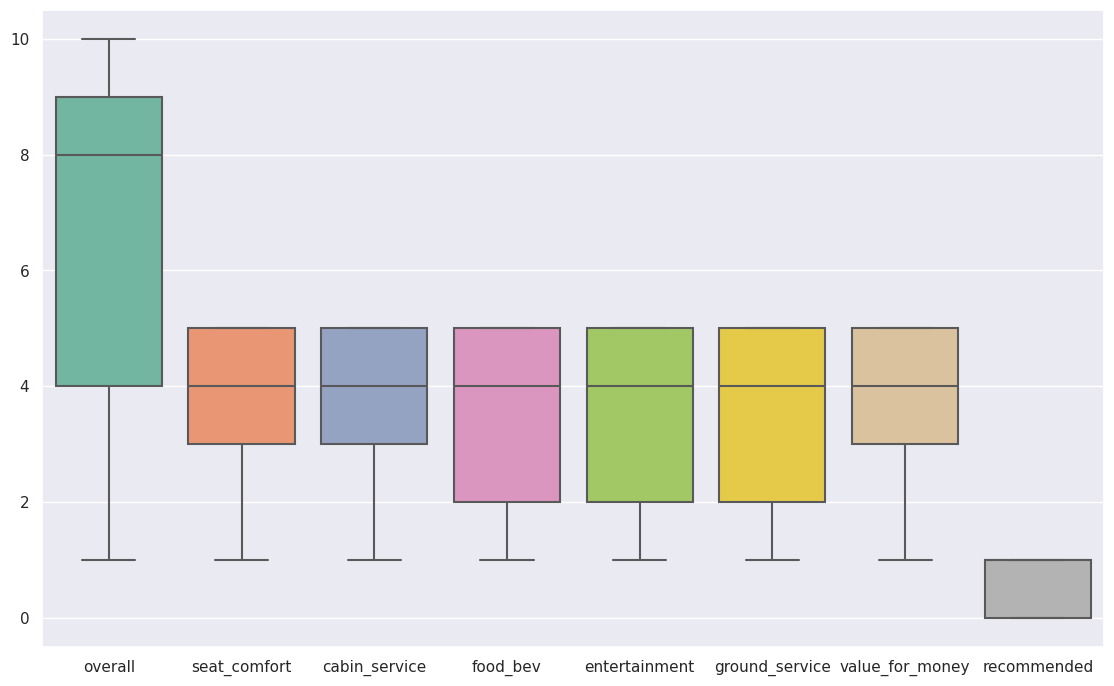

In [238]:
# Checking outliers for the box plot
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(13.7,8.27)})
ax = sns.boxplot(data=airline_df, orient="v", palette="Set2")

With these our Explorative Data Analysis is complete

## **Feature Engineering & Data Pre-processing**

### Reducing cardinality & Feature Encoding

In [239]:
# Creating a copy of the original dataset & dropping 'value_for_money' feature from it as per our VIF analysis
airline_df_cp = airline_df.copy().drop('value_for_money',axis = 1)

In [240]:
# first view of the copied dataset after droping the 'value_for_money' feature
airline_df_cp.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,1
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,0
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,1
19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,0
29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,0


In [241]:
# creating a list of columns whose cardinality is to be checked
cols_for_cardinality_check = ['airline','overall','seat_comfort','cabin_service','food_bev','entertainment','cabin','traveller_type','ground_service','recommended']

In [242]:
# Number of labels = cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in airline_df_cp[cols_for_cardinality_check]:
    print(var, ' contains ', len(airline_df_cp[var].unique()), ' labels')

airline  contains  81  labels
overall  contains  10  labels
seat_comfort  contains  5  labels
cabin_service  contains  5  labels
food_bev  contains  5  labels
entertainment  contains  5  labels
cabin  contains  4  labels
traveller_type  contains  4  labels
ground_service  contains  5  labels
recommended  contains  2  labels


In [243]:
# encoding the original data
airline_df_cp['cabin'] = airline_df_cp['cabin'].map({'Economy Class':0 ,'Business Class':1 ,'First Class':2 ,'Premium Economy':3})
airline_df_cp['traveller_type'] = airline_df_cp['traveller_type'].map({'Solo Leisure':0 ,'Couple Leisure':1 ,'Business':2 ,'Family Leisure':3})

# creating dummies values for the airline feature
airline_df_cp = pd.get_dummies(airline_df_cp, columns=['airline'])

In [244]:
# first view of data after encoding
airline_df_cp.head()

,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,...,airline_Turkish Airlines,airline_Ukraine International,airline_United Airlines,airline_Virgin America,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai
7,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,0,0,Washington Dulles to Karachi,April 2019,4.0,...,1,0,0,0,0,0,0,0,0,0
15,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,0,0,Basel to Cape Town via Istanbul,April 2019,3.0,...,1,0,0,0,0,0,0,0,0,0
17,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,0,0,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,...,1,0,0,0,0,0,0,0,0,0
19,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,0,0,Venice to Boston via Istanbul,February 2019,1.0,...,1,0,0,0,0,0,0,0,0,0
29,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,0,0,Houston to Kiev via Istanbul,March 2019,1.0,...,1,0,0,0,0,0,0,0,0,0


In [245]:
# checking shape of data after feature encoding
airline_df_cp.shape

(13189, 96)

In [246]:
# checking all columns in new data set after feature encoding & creating dummy variable  
airline_df_cp.columns

Index(['overall', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'recommended', 'airline_ANA All Nippon Airways',
       'airline_Adria Airways', 'airline_Aegean Airlines',
       'airline_Aer Lingus', 'airline_Aeroflot Russian Airlines',
       'airline_Aeromexico', 'airline_Air Arabia', 'airline_Air Canada',
       'airline_Air Canada rouge', 'airline_Air China', 'airline_Air Europa',
       'airline_Air France', 'airline_Air India', 'airline_Air New Zealand',
       'airline_AirAsia', 'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_C

### Checking Class Imbalance of Target variable 

In [247]:
# counting the total number of each class present in the dataset
# here yes = 1, no = 0
airline_df_cp['recommended'].value_counts()

1    8802
0    4387
Name: recommended, dtype: int64

In [248]:
# calculating the total number of rows in the dataset
total = airline_df_cp['recommended'].value_counts()[1] + airline_df_cp['recommended'].value_counts()[0]
print('total target variable label count :',total)

# calculating the percentage of observations of dependent variable belonging to the class 1
percentage_class_1 = round((airline_df_cp['recommended'].value_counts()[1]/total)*100,2)
print('Percentage of class 1 :',percentage_class_1)

# calculating the percentage of observations of dependent variable belonging to the class 0
percentage_class_0 = round((airline_df_cp['recommended'].value_counts()[0]/total)*100,2)
print('Percentage of class 0 :',percentage_class_0)

total target variable label count : 13189
Percentage of class 1 : 66.74
Percentage of class 0 : 33.26


Here we are having the class imbalance as the class 1 is almost double(2x) of class 0 

The model will accurately predict the class 1 but might create error in prediction of class 0 as during training the model it will get trained more on the class 1 basis

So we have to perform class imbalance handling operation to fix this problem & we will use Synthetic Minority Oversampling Technique (SMOTE) process

## Synthetic Minority Oversampling Technique (SMOTE)


In [249]:
# defining x_data to pass in smote analysis 
x_data = airline_df_cp.drop(columns = ['date_flown','route','aircraft','customer_review','review_date','author','recommended'],axis =1) 

# defining object of the class SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_data, airline_df_cp['recommended'])

print('Original dataset shape', len(airline_df_cp))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 13189
Resampled dataset shape 17604


In [250]:
# counting the total number of each class present in the dataset after performing the SMOTE
# here yes = 1, no = 0
y_smote.value_counts()

1    8802
0    8802
Name: recommended, dtype: int64

As we can see after performing the SMOTE method both the class of the feature 'recommended' are balance with 8802 values belonging to class 1 & 8802 values belonging to class 0

## **Train Test Split**

In [251]:
# splitting the dataset into 80(training) - 20(testing) ratio
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.2, random_state=0) 

In [252]:
# checking the shape of the test & train dataset
print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of y_test is',y_test.shape)   

The shape of X_train is (14083, 89)
The shape of X_test is (3521, 89)
The shape of y_train is (14083,)
The shape of y_test is (3521,)


## **ML Model Implementation**

The Models used for the Classsification of airline recommendation as 'yes' or 'no' are :

1. Logistic Regression 
2. Decision Tree Classifier
3. K-Nearest Neighbors 
4. Support Vector Machine  
5. XG Boost Classifier

### Logistic Regression 

In [253]:
# creating a dict of parameters to find the most optimum parameters using gridsearchCV for LogisticRegression
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
         
# implementing gridsearchcv
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [254]:
#training the LogisticRegression model
logistic_clf.fit(X_train,y_train)

# the best optimum parameters resulted from gridsearchcv
logistic_clf.best_params_

{'C': 1000000.0, 'class_weight': 'balanced', 'penalty': 'l2'}

In [255]:
# making predictions on test dataset 
logistic_predict = logistic_clf.predict(X_test)

In [256]:
# accuracy of the LogisticRegression model on test dataset
logistic_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 95.77%


In [257]:
# test & train dataset roc-auc score
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9543421146062628
Test ROC-AUC score :  0.9576824765691565


<Axes: >

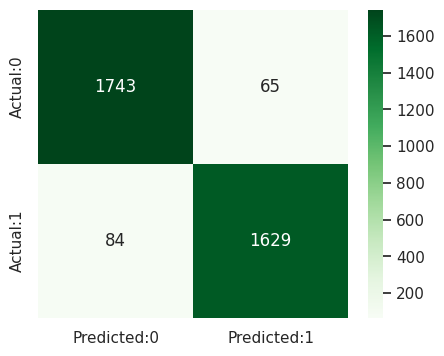

In [258]:
# confusion matrix for LogisticRegression Model
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens")

In [259]:
# classification report for the LogisticRegression model
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1808
           1       0.96      0.95      0.96      1713

    accuracy                           0.96      3521
   macro avg       0.96      0.96      0.96      3521
weighted avg       0.96      0.96      0.96      3521



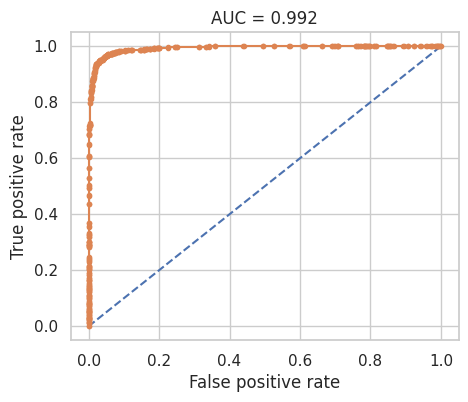

In [260]:
# ROC curve and AUC
probs_lgr = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lgr = probs_lgr[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs_lgr)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_lgr)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(5,4)) 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

### Decision Tree Classifier

In [261]:
# defining dict of parameter for gridsearchcv
param_grid = {
    'max_depth': [2, 3, 4, 5,10],
    'min_samples_split': [2, 3, 4,7,10,50,100],
    'min_samples_leaf': [1, 2, 3,4,5],
    'criterion': ['gini', 'entropy']
}
# implementing the gridsearchcv to find the best optimal parameters for our model 
decision_tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10, n_jobs=-1)

# fitting the DecisionTreeClassifier model
decision_tree_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 7, 10, 50, 100]})

In [262]:
# Viewving the best resulted parameter from the gridsearchcv
decision_tree_clf.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=3)

In [263]:
# making predictions on test dataset
decision_tree_predict = decision_tree_clf.predict(X_test)

In [264]:
# accuracy of the DecisionTreeClassifier model 
decision_tree_accuracy = accuracy_score(y_test,decision_tree_predict)
print(f"Using decision_tree_classifier we get an accuracy of {round(decision_tree_accuracy*100,2)}%")

Using decision_tree_classifier we get an accuracy of 95.57%


In [265]:
# test & train dataset roc-auc score 
print('Train ROC-AUC score : ', decision_tree_clf.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', decision_tree_clf.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9525669246609387
Test ROC-AUC score :  0.9556944049985799


<Axes: >

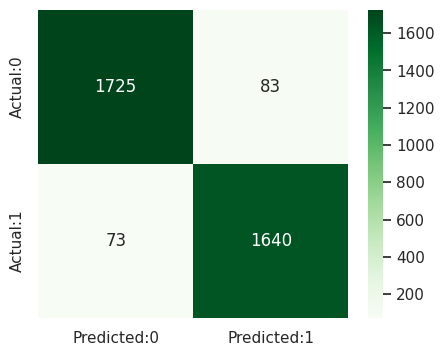

In [266]:
# confusion matrix of Decision_tree_classifier Model
tree_cm =confusion_matrix(y_test,decision_tree_predict)
conf_matrix=pd.DataFrame(data=tree_cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens")

In [267]:
# classification report for the DecisionTreeClassifier model
print(classification_report(y_test,decision_tree_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1808
           1       0.95      0.96      0.95      1713

    accuracy                           0.96      3521
   macro avg       0.96      0.96      0.96      3521
weighted avg       0.96      0.96      0.96      3521



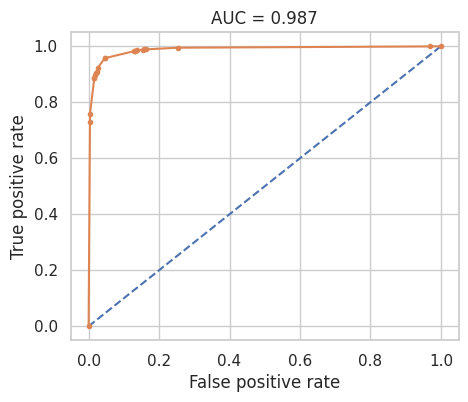

In [268]:
# ROC curve and AUC
probs_dct = decision_tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dct = probs_dct[:, 1]
# calculate AUC
dct_auc = roc_auc_score(y_test, probs_dct)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_dct)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(dct_auc,3)}")
plt.show()

### K Nearest Neighbors 

In [269]:
# defining dict of parameters for KNeighborsClassifier
param_grid_knn = {'n_neighbors':np.arange(1,50)}

# implementing the gridsearchcv to find the best optimal parameters for our model 
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=10)

# training the KNN model
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [270]:
# Viewving the best resulted parameter from the gridsearchcv
knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=32)

In [271]:
#making predictions on test dataset
knn_clf_predict = knn_clf.predict(X_test)

In [272]:
# accuracy of the KNN model
knn_accuracy = accuracy_score(y_test,knn_clf_predict)
print(f"Using knn_classifier we get an accuracy of {round(knn_accuracy*100,2)}%")

Using knn_classifier we get an accuracy of 94.58%


In [273]:
# test & train dataset roc-auc score
print('Train ROC-AUC score : ', knn_clf.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', knn_clf.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9453241496840162
Test ROC-AUC score :  0.9457540471456972


<Axes: >

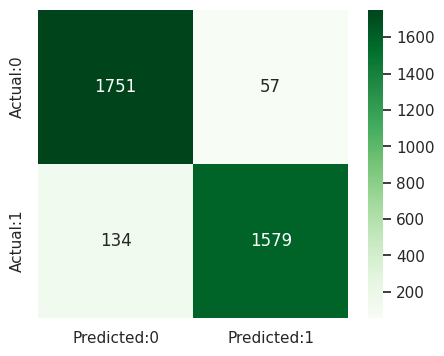

In [274]:
# confusion matrix of knn_classifier Model
knn_cm =confusion_matrix(y_test,knn_clf_predict)
conf_matrix=pd.DataFrame(data=knn_cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens")

In [275]:
# classification report for the DecisionTreeClassifier model
print(classification_report(y_test,knn_clf_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1808
           1       0.97      0.92      0.94      1713

    accuracy                           0.95      3521
   macro avg       0.95      0.95      0.95      3521
weighted avg       0.95      0.95      0.95      3521



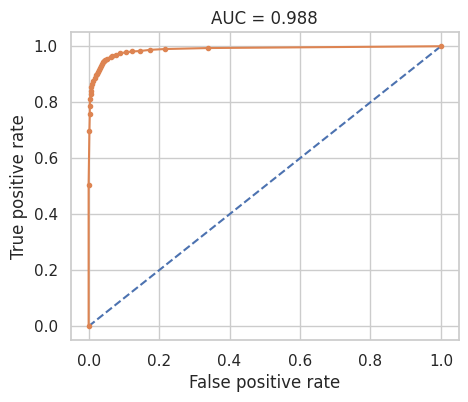

In [276]:
# ROC curve and AUC
probs_knn = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn = probs_knn[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs_knn)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_knn)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

### XGBoost classifier

In [277]:
# creating object xgb_clf of class XGBoost Classifier model
xgb_clf = XGBClassifier()
# training the XGBoost classifier
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [278]:
#making predictions on test dataset
xgb_predict = xgb_clf.predict(X_test)

In [279]:
# finding the accuracy of the XGBoost classifier model
xgb_accuracy = accuracy_score(y_test,xgb_predict)
print(f"Using XG boost we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG boost we get an accuracy of 95.97%


<Axes: >

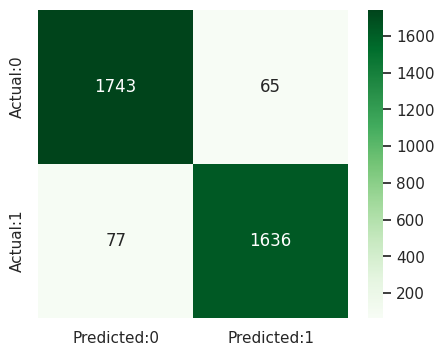

In [280]:
# confusion matrix of XG boost Classifier
cm_xgb =confusion_matrix(y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm_xgb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens")

In [281]:
# getting the classification report of the XGBoost classifier
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1808
           1       0.96      0.96      0.96      1713

    accuracy                           0.96      3521
   macro avg       0.96      0.96      0.96      3521
weighted avg       0.96      0.96      0.96      3521



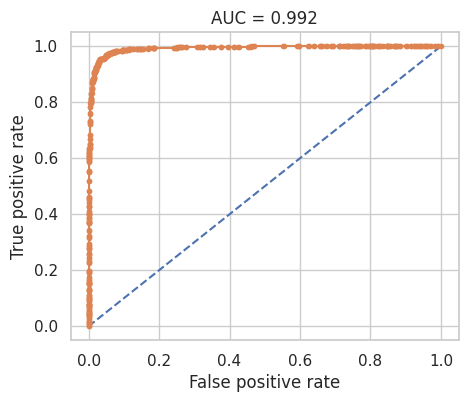

In [282]:
# ROC curve and AUC 
probs_xgb = xgb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_xgb = probs_xgb[:, 1]
# calculate AUC
xgb_auc = roc_auc_score(y_test, probs_xgb)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_xgb)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_auc,3)}")
plt.show()


### Support Vector Machine

In [283]:
# creating object svm_clf of SVC class
svm_clf=SVC(kernel='linear', probability=True)

In [284]:
#training the classifier
svm_clf.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [285]:
# making predictions on test dataset 
svm_predict = svm_clf.predict(X_test)

In [286]:
# getting accuracy of the SVM model on the test dataset
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using Support Vector Machine we get an accuracy of {round(svm_accuracy*100,2)}%")

Using Support Vector Machine we get an accuracy of 95.83%


<Axes: >

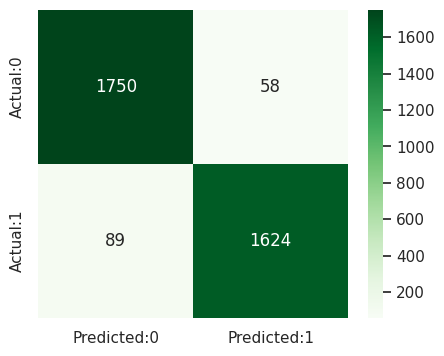

In [287]:
# confusion matrix of SVM 
svm_cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=svm_cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens")

In [288]:
# getting classification report of the SVM 
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1808
           1       0.97      0.95      0.96      1713

    accuracy                           0.96      3521
   macro avg       0.96      0.96      0.96      3521
weighted avg       0.96      0.96      0.96      3521



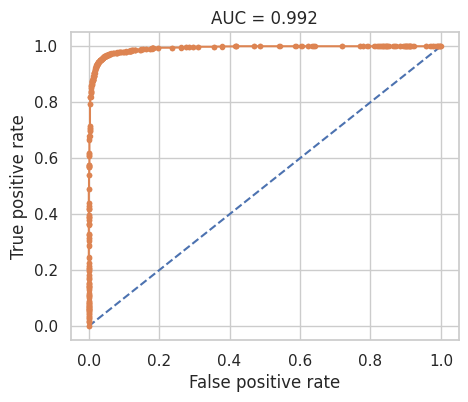

In [289]:
# ROC curve and AUC 
probs_svm = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_svm = probs_svm[:, 1]
# calculate AUC
svc_auc = roc_auc_score(y_test, probs_svm)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_svm)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svc_auc,3)}")
plt.show()
     

### Model Performances

In [290]:
# creating a dataframe to store the evaluation metrics of the applied ML models in one table
final_performance_report = pd.DataFrame({
    "Logistic regression":{'Test Accuracy':logistic_accuracy.round(3),'Precision': precision_score(y_test, logistic_predict).round(3),'Recall': recall_score(y_test, logistic_predict).round(3),'F1 Score': f1_score(y_test, logistic_predict).round(3), 'AUC':log_auc.round(3)},
    "Decision Tree":{'Test Accuracy':decision_tree_accuracy.round(3),'Precision': precision_score(y_test, decision_tree_predict).round(3),'Recall': recall_score(y_test, decision_tree_predict).round(3),'F1 Score': f1_score(y_test, decision_tree_predict).round(3), 'AUC':dct_auc.round(3)},
    "K Nearest Neighbours":{'Test Accuracy':knn_accuracy.round(3),'Precision': precision_score(y_test, knn_clf_predict).round(3),'Recall': recall_score(y_test, knn_clf_predict).round(3),'F1 Score': f1_score(y_test, knn_clf_predict).round(3), 'AUC':knn_auc.round(3)},
    "XG Boost":{'Test Accuracy':xgb_accuracy.round(3),'Precision': precision_score(y_test, xgb_predict).round(3),'Recall': recall_score(y_test, xgb_predict).round(3),'F1 Score': f1_score(y_test, xgb_predict).round(3), 'AUC':xgb_auc.round(3)},
    "Support vector machine":{'Test Accuracy':svm_accuracy.round(3),'Precision': precision_score(y_test, svm_predict).round(3),'Recall': recall_score(y_test, svm_predict).round(3),'F1 Score': f1_score(y_test, svm_predict).round(3), 'AUC':svc_auc.round(3)}
}).T

In [291]:
final_performance_report

,Test Accuracy,Precision,Recall,F1 Score,AUC
Logistic regression,0.958,0.962,0.951,0.956,0.992
Decision Tree,0.956,0.952,0.957,0.955,0.987
K Nearest Neighbours,0.946,0.965,0.922,0.943,0.988
XG Boost,0.960,0.962,0.955,0.958,0.992
Support vector machine,0.958,0.966,0.948,0.957,0.992


From above performance table we can say that ,

**XGBoost** & **Support Vector Machine** are the Best Performing Models offering F1 score of 95% as compared to other implemented ML models

## **Model Explainability**

Model explainability is the process of understanding how a machine learning model arrives at its decisions or predictions. There are several theories and techniques that have been developed to improve the explainability of machine learning models.

We have implemented ELI5 "Explain Like I'm 5" method for model explainability.

### ELI5

In [292]:
# getting weights of all the features that affects the output of XGBoost Classifier
eli.explain_weights(xgb_clf)

Weight,Feature
0.6368,overall
0.0135,airline_Etihad Airways
0.0121,seat_comfort
0.0118,airline_Swiss Intl Air Lines
0.0114,airline_Turkish Airlines
0.0113,cabin_service
0.0106,ground_service
0.0103,entertainment
0.0101,food_bev
0.0100,airline_Air China


We can see from above output that the feature 'overall' is affecting the prediction (yes/no) most for the XGBoost Classifier Model

The reason for this is that the feature got more weight as compared to the other features present in the dataset

In [293]:
# getting weights of all the features that affects the output of SVM Classifier
eli.explain_weights(svm_clf)

Weight?,Feature
+2.171,x64
+2.128,x27
+2.114,x51
+2.108,x18
+2.000,x9
+2.000,x17
+2.000,x22
+2.000,x35
+2.000,x78
+2.000,x88


In [294]:
import re

# creating a function to find the features based on the ELI5 index values
def get_feature_name_from_eli5_index(eli5_index, feature_names):
    # Extract the feature index from the ELI5 feature name
    match = re.match(r"X(\d+)", eli5_index)
    if not match:
        raise ValueError(f"Invalid ELI5 feature name: {eli5_index}")
    feature_index = int(match.group(1)) - 1
    
    # Get the corresponding feature name
    if feature_index >= len(feature_names) or feature_index < 0:
        raise ValueError(f"ELI5 feature index {feature_index+1} out of range for feature names list")
    feature_name = feature_names[feature_index]
    
    return feature_name

In [295]:
# list of all features used in the model
feature_names = X_train.columns

# ELI5 index whose actual feature name is to be found
eli5_feature_name = "X64"

# getting feature name of the passed ELI5 index
feature_name = get_feature_name_from_eli5_index(eli5_feature_name, feature_names)
print(f"ELI5 feature '{eli5_feature_name}' corresponds to feature '{feature_name}'")

ELI5 feature 'X64' corresponds to feature 'airline_Royal Air Maroc'


We can see from above output that the feature 'x64' which is 'airline_Royal Air Maroc' is affecting the prediction (yes/no) most for the Support Vector Machine Model

The reason for this is that the feature got more weight as compared to the other features present in the dataset

# **Conclusion**

The Models used for the Classsification of airline recommendation as 'yes' or 'no' are :

**1. Logistic Regression**

**2. Decision Tree Classifier**

**3. K-Nearest Neighbors**

**4. Support Vector Machine**

**5. XG Boost Classifier**

We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, K-Nearest Neighbor and Logistic Regression To increase accuracy and avoid Overfitting Criteria.

Based on the knowledge of the business and the problem usecase. The Classification metrics of Precision ,Recall, f1 score & auc value is given priority.

Among all implemented ML models SVM & XGBoost were able to give f1 score of around 95% - 96% resulting them as best performing ML Models

The most important feature that affected the prediction most for the XGboost & SVM were 'overall' & 'airline_Royal Air Maroc' Feature . These features were having more weight as compared to other features for that specific ML Model.

The classifier models created can be utilised to forecast passenger referral because they will enable airlines to recognise influential travellers who can contribute to higher revenue.

As a result, in order to grow or expand, our client must offer top-notch ratings in - cabin, ground, food and beverage, entertainment, and seat comfort.